# Modelo de Lotka-Volterra
## Ecuaciones diferenciales

$$
\begin{align}
&\frac{dx}{dt} = x (\alpha - \beta y)&\\

&\frac{dy}{dt} = -y (\gamma - \delta x)&
\end{align}
$$

C:\Users\olmov\AppData\Local\Temp\ipykernel_10584\912600286.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  fx = alpha * x ** 2 / y - beta * x
C:\Users\olmov\AppData\Local\Temp\ipykernel_10584\912600286.py:15: RuntimeWarning: invalid value encountered in scalar divide
  fx = alpha * x ** 2 / y - beta * x


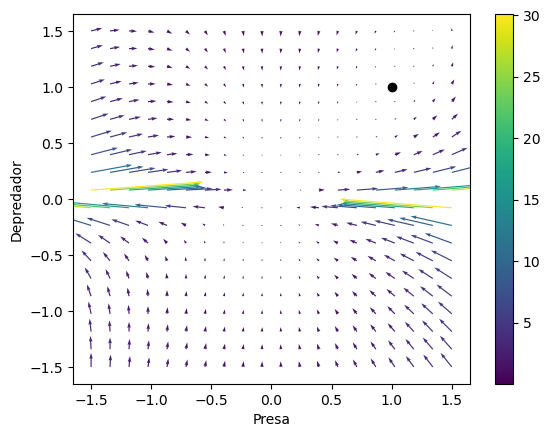

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.optimize as op


# Sistema de ecuaciones diferenciales 
def equations(vars):
   # Parámetros del sistema
   alpha = 1
   beta = 1
   gamma = 1
   delta = 1
   x, y = vars
   fx = alpha * x ** 2 / y - beta * x
   fy = alpha * x ** 2 - gamma * y

   return fx, fy

# Buscamos los estados estacionarios
x_i = np.linspace(-10, 10, 100)
y_i = np.linspace(-10, 10, 100)
initial_guesses = np.stack((x_i, y_i), axis=1)

stat = [[], []]

for guess in initial_guesses:
   result = op.root(fun=equations, x0=guess)
   if result.success:
      roots = np.round(result.x, 2)
      stat = np.column_stack((stat, roots))

x_0, y_0 = np.unique(np.round(stat), axis=1)



plt.scatter(x_0, y_0, marker='o', c='k' )

x_max = x_0.max()
y_max = y_0.max()

x_min = np.abs(x_0.min())
y_min = np.abs(y_0.min())

# Rango de las variables
x = np.linspace(-1.5 * x_min, 1.5 * x_max, 20)
y = np.linspace(-1.5 * y_min, 1.5 * y_max, 20)

# Creamos el grid con las posiciones
x_grid, y_grid = np.meshgrid(x, y)


fx, fy = equations([x_grid, y_grid])
magnitude = np.sqrt(fx ** 2 + fy ** 2)

# Graficamos el campo vectorial
plt.quiver(x, y, fx, fy, magnitude , cmap='viridis', norm='linear')
plt.colorbar()
plt.xlabel('Presa')
plt.ylabel('Depredador')

plt.show()